In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import warnings
warnings.filterwarnings('ignore')


In [101]:
df = pd.read_csv(r'C:\Users\Admins\Downloads\coupon.csv')

In [102]:
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## Shape

In [103]:
df.shape

(12684, 25)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

## Missing Value Treatment 

In [105]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept(Y/N?)                0
dtype: int64

In [106]:
df.isnull().sum()/len(df)*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept(Y/N?)             0.000000
dtype: float64

In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['car_numeric'] = le.fit_transform(df['car'])

In [108]:
#Feature importance of car column with the target varaibale 
corr = df['car_numeric'].corr(df['Accept(Y/N?)'])
print(f"Correlation between car and target: {corr:.4f}")

Correlation between car and target: -0.0128


In [109]:
df = df.drop(columns=['car','car_numeric'])

## Simple imputer method to fill the missing values

In [110]:
range_map = {'never':0,'less1':0.5,'1~3':2,'4~8':6,'gt8':10}
range_columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20',
                 'Restaurant20To50']
for col in range_columns:
    df[col] = df[col].map(range_map)

In [111]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df[range_columns] = num_imputer.fit_transform(df[range_columns])

In [112]:
df.isnull().sum()/len(df)*100

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Accept(Y/N?)            0.0
dtype: float64

## Duplicates

In [113]:
df.duplicated().sum()

np.int64(291)

In [114]:
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)

In [115]:
df.duplicated().sum()

np.int64(0)

## Encoding

In [116]:
for i in df.columns:
    print("**************************",i, "*****************************")
    print()
    print(set(df[i].tolist()))
    print()

************************** destination *****************************

{'Home', 'Work', 'No Urgent Place'}

************************** passanger *****************************

{'Alone', 'Friend(s)', 'Kid(s)', 'Partner'}

************************** weather *****************************

{'Rainy', 'Sunny', 'Snowy'}

************************** temperature *****************************

{80, 30, 55}

************************** coupon *****************************

{'Restaurant(20-50)', 'Restaurant(<20)', 'Bar', 'Coffee House', 'Carry out & Take away'}

************************** expiration *****************************

{'1d', '2h'}

************************** gender *****************************

{'Female', 'Male'}

************************** age *****************************

{'46', '21', 'below21', '36', '41', '26', '31', '50plus'}

************************** maritalStatus *****************************

{'Married partner', 'Widowed', 'Single', 'Divorced', 'Unmarried partner'}

**********

In [ ]:
destination           12684 non-null  object #one hot
 1   passanger             12684 non-null  object #one hot
 2   weather               12684 non-null  object #one hot
coupon                12684 non-null  object #one hot 
 5   expiration            12684 non-null  object#mapping 
 6   gender                12684 non-null  object #maping
 7   age                   12684 non-null  object #mapping
 8   maritalStatus         12684 non-null  object #one hot
10  education             12684 non-null  object #label endocer
 11  occupation            12684 non-null  object #group

 12  income                12684 non-null  object 

## Handling Ordinal columns

In [117]:
education_map = {
    'Some High School': 0,
    'High School Graduate': 1,
    'Some college - no degree': 2,
    'Associates degree': 3,
    'Bachelors degree': 4,
    'Graduate degree (Masters or Doctorate)': 5
}


df['education'] = df['education'].map(education_map)

print(df['education'].isna().sum())
print(df['education'].unique())


0
[2 4 3 1 5 0]


In [118]:
age_map = {'below21':20,
                '21':21,
                '26':26,
                '31':31,
                '36':36,
                '41':41,
                '46':46,
                '50plus':55
                }
df['age']=df['age'].map(age_map)

In [119]:
income_map = {'Less than $12500':0,
                '$12500 - $24999':1,
                '$25000 - $37499':2,
                '$37500 - $49999':3,
                '$50000 - $62499':4,
                '$62500 - $74999':5,
                '$75000 - $87499':6,
                '$87500 - $99999':7,
                '$100000 or More':8
                }
df['income']=df['income'].map(income_map)

In [120]:
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [121]:
df['expiration']=df['expiration'].map({'2h':0,'1d':1})

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_cols = ['destination','passanger','weather','coupon',
              'maritalStatus']
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12393 entries, 0 to 12392
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12393 non-null  int64  
 1   passanger             12393 non-null  int64  
 2   weather               12393 non-null  int64  
 3   temperature           12393 non-null  int64  
 4   coupon                12393 non-null  int64  
 5   expiration            12393 non-null  int64  
 6   gender                12393 non-null  int64  
 7   age                   12393 non-null  int64  
 8   maritalStatus         12393 non-null  int64  
 9   has_children          12393 non-null  int64  
 10  education             12393 non-null  int64  
 11  occupation            12393 non-null  object 
 12  income                12393 non-null  int64  
 13  Bar                   12393 non-null  float64
 14  CoffeeHouse           12393 non-null  float64
 15  CarryAway          

In [126]:
occupation_groups = {
    'Unemployed': 'Unemployed/Other',
    'Student': 'Student',
    'Retired': 'Unemployed/Other',
    'Computer & Mathematical': 'Tech',
    'Sales & Related': 'Business',
    'Education&Training&Library': 'Education',
    'Management': 'Business',
    'Office & Administrative Support': 'Business',
    'Arts Design Entertainment Sports & Media': 'Arts',
    'Business & Financial': 'Business',
    'Food Preparation & Serving Related': 'Other',
    'Healthcare Support': 'Healthcare',
    'Healthcare Practitioners & Technical': 'Healthcare',
    'Community & Social Services': 'Other',
    'Legal': 'Other',
    'Transportation & Material Moving': 'Other',
    'Architecture & Engineering': 'Tech',
    'Personal Care & Service': 'Other',
    'Protective Service': 'Other',
    'Life Physical Social Science': 'Education',
    'Construction & Extraction': 'Other',
    'Installation Maintenance & Repair': 'Other',
    'Production Occupations': 'Other',
    'Building & Grounds Cleaning & Maintenance': 'Other',
    'Farming Fishing & Forestry': 'Other'
}

In [127]:
df['occupation']=df['occupation'].str.strip()

In [128]:
df['occupation']=df['occupation'].map(occupation_groups)
df['occupation']=df['occupation'].astype('category').cat.codes
print(df['occupation'].dtypes)
print(df['occupation'].unique()[:10])

int8
[7 6 5 2 3 1 0 4]


In [129]:
print(df['occupation'].dtypes)

int8


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12393 entries, 0 to 12392
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12393 non-null  int64  
 1   passanger             12393 non-null  int64  
 2   weather               12393 non-null  int64  
 3   temperature           12393 non-null  int64  
 4   coupon                12393 non-null  int64  
 5   expiration            12393 non-null  int64  
 6   gender                12393 non-null  int64  
 7   age                   12393 non-null  int64  
 8   maritalStatus         12393 non-null  int64  
 9   has_children          12393 non-null  int64  
 10  education             12393 non-null  int64  
 11  occupation            12393 non-null  int8   
 12  income                12393 non-null  int64  
 13  Bar                   12393 non-null  float64
 14  CoffeeHouse           12393 non-null  float64
 15  CarryAway          

## Outliers

In [131]:
numeric_cols = df.select_dtypes(include=['int64','float64','int8']).columns
print("Numeric columns:",list(numeric_cols))

Numeric columns: ['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Accept(Y/N?)']


In [133]:
# -----------------------------
# Function to calculate outlier percentage
# -----------------------------
def outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return (len(outliers) / len(series)) * 100


In [134]:
for col in numeric_cols:
    perc = outlier_percentage(df[col])
    print(f"{col}: {perc:.2f}% outliers remaining")


destination: 0.00% outliers remaining
passanger: 8.62% outliers remaining
weather: 20.42% outliers remaining
temperature: 0.00% outliers remaining
coupon: 0.00% outliers remaining
expiration: 0.00% outliers remaining
gender: 0.00% outliers remaining
age: 0.00% outliers remaining
maritalStatus: 1.04% outliers remaining
has_children: 0.00% outliers remaining
education: 0.00% outliers remaining
occupation: 0.00% outliers remaining
income: 0.00% outliers remaining
Bar: 11.16% outliers remaining
CoffeeHouse: 22.88% outliers remaining
CarryAway: 0.00% outliers remaining
RestaurantLessThan20: 0.00% outliers remaining
Restaurant20To50: 7.84% outliers remaining
toCoupon_GEQ5min: 0.00% outliers remaining
toCoupon_GEQ15min: 0.00% outliers remaining
toCoupon_GEQ25min: 11.81% outliers remaining
direction_same: 21.37% outliers remaining
direction_opp: 21.37% outliers remaining
Accept(Y/N?): 0.00% outliers remaining


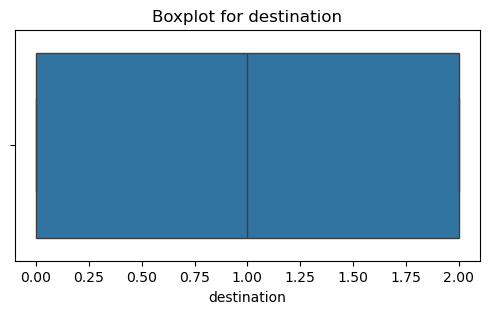

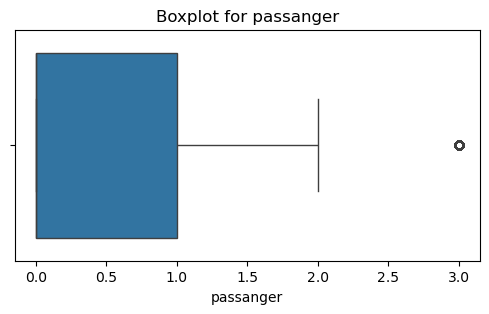

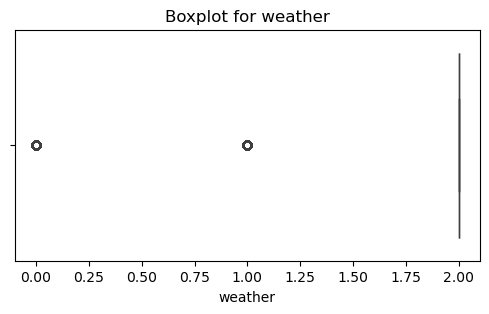

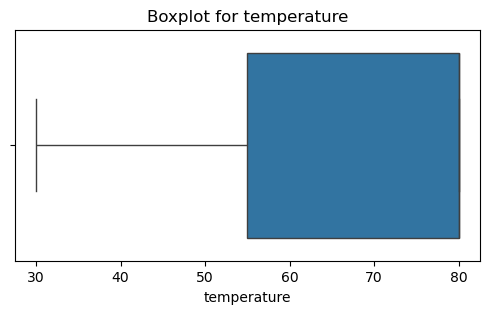

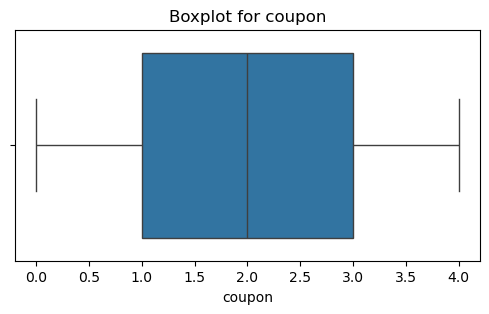

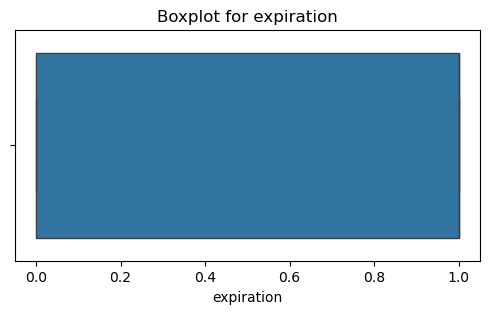

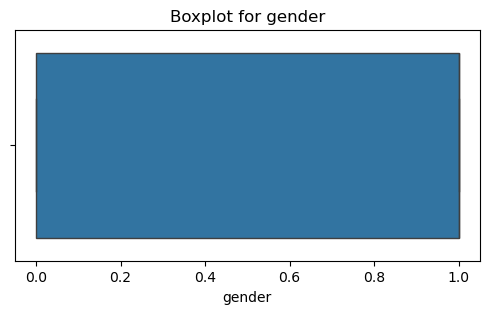

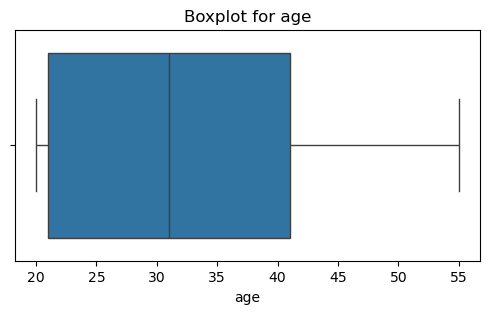

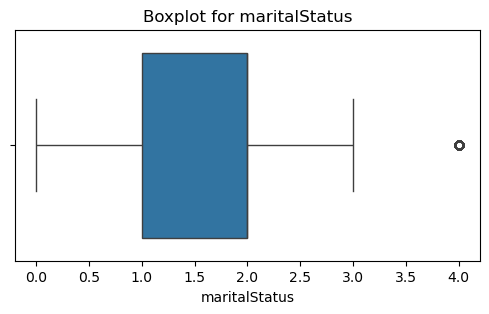

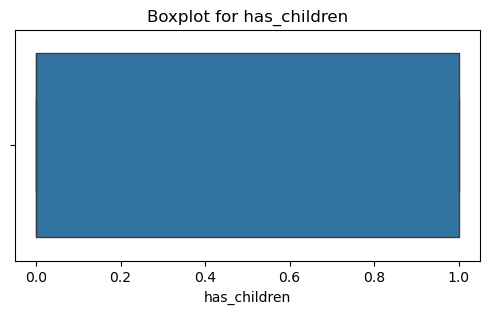

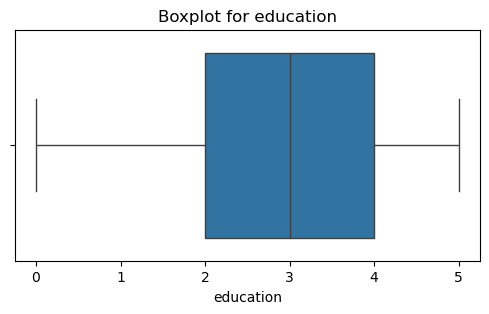

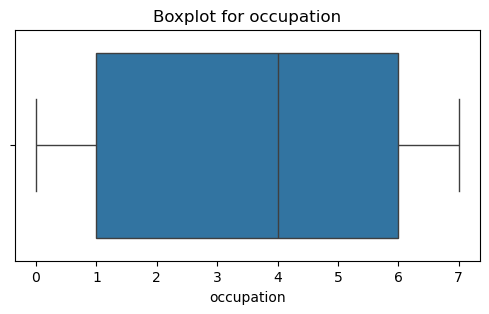

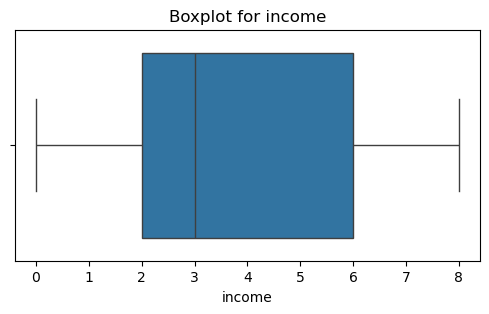

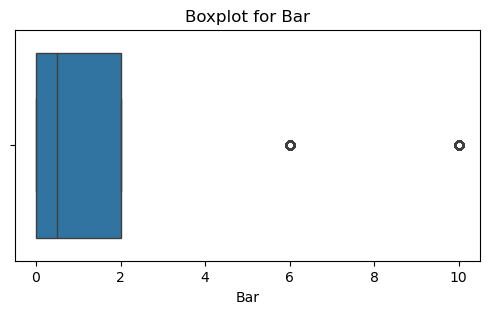

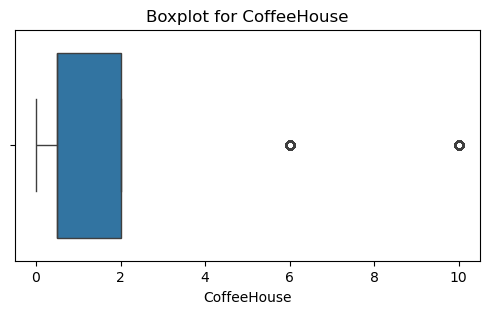

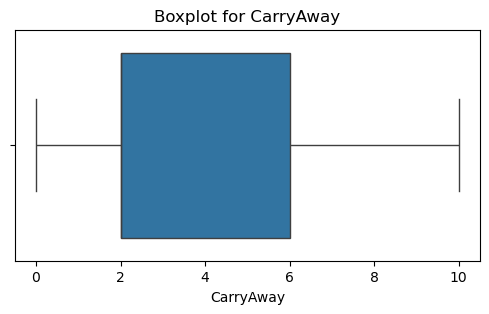

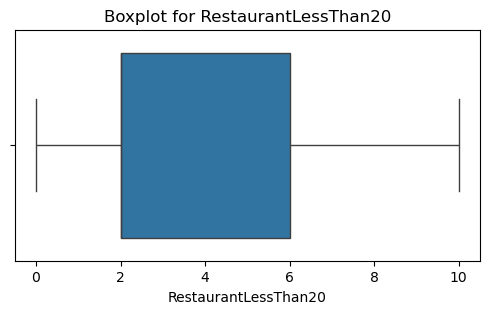

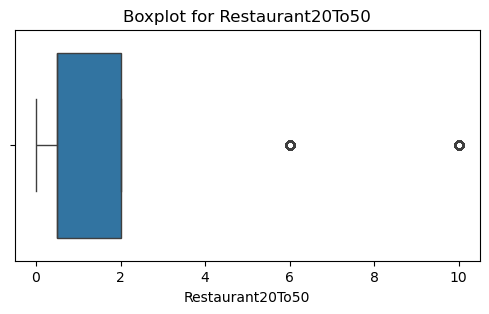

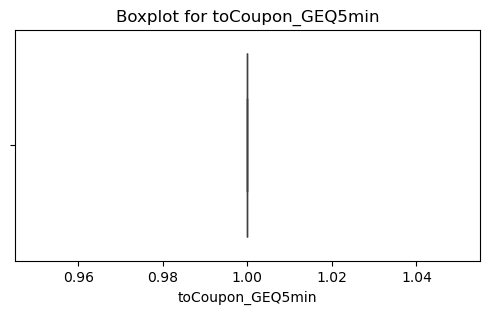

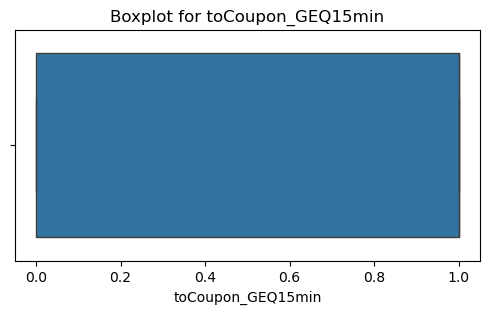

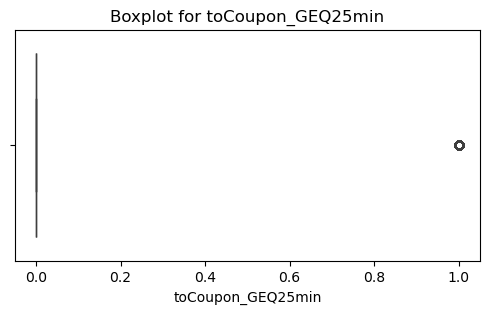

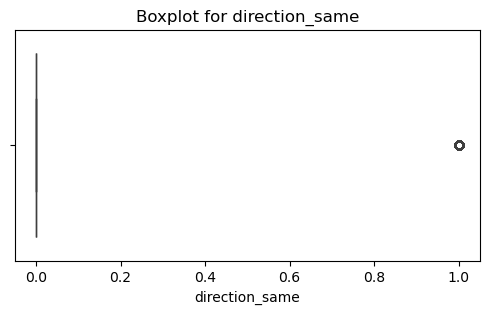

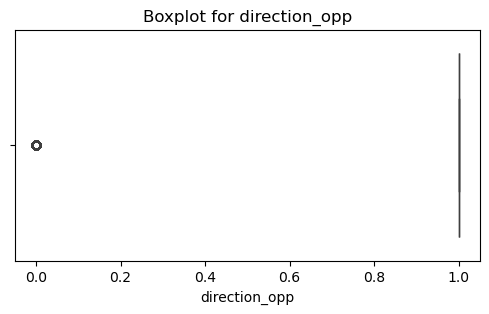

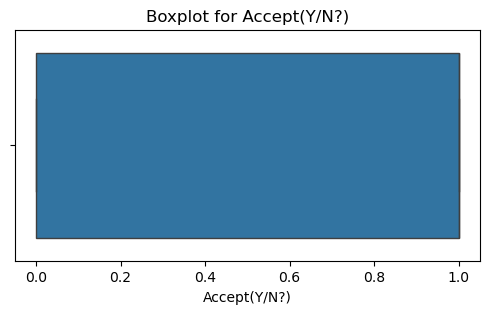

In [34]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Standardisation

In [39]:
from sklearn.model_selection import train_test_split
X = df.drop('Accept(Y/N?)',axis=1)
y = df['Accept(Y/N?)']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = x_train.select_dtypes(include=['int64','float64','int8']).columns
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [42]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.600242033077854


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print("RF Accuracy:",accuracy_score(y_test,y_pred_rf))

RF Accuracy: 0.7365873336022589


In [140]:
!pip install scikit-learn


## Stacking Ensemble with Polynomial Feature and SMOTE

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best XGBoost Params {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 600, 'subsample': 0.8}
[LightGBM] [Warning] Unknown parameter: mx_depth
Stacking Ensemble Accuracy: 0.7825936199722607

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1410
           1       0.78      0.80      0.79      1474

    accuracy                           0.78      2884
   macro avg       0.78      0.78      0.78      2884
weighted avg       0.78      0.78      0.78      2884


Confusion Matrix:
 [[1079  331]
 [ 296 1178]]


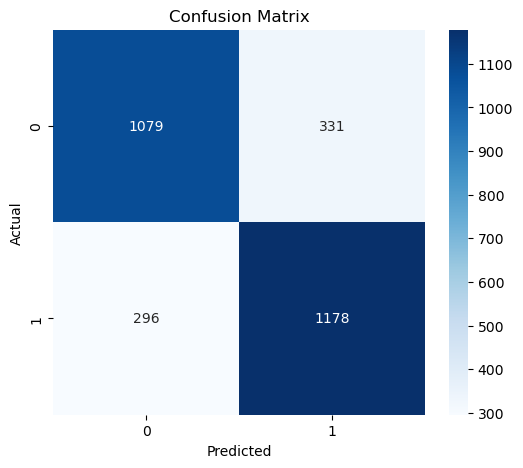

In [162]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

#Encoding again to avaoid the confusion
cat_cols = X.select_dtypes(include='object').columns
encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])

#Balancing the data with SMOTE technique
smote = SMOTE(random_state = 42)
X_res,y_res = smote.fit_resample(X,y)

#Splitting the data
X_train,X_val,y_train,y_val = train_test_split(
    X_res,y_res,test_size=0.2,random_state=42
)

#Taking polynomial Features
numeric_cols = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_train_poly = poly.fit_transform(X_train[numeric_cols])
X_val_poly = poly.transform(X_val[numeric_cols])

#combining the ploynomial features to the origina data
X_train_full = np.hstack([X_train.values,X_train_poly])
X_val_full = np.hstack([X_val.values,X_val_poly])


#Hyperparameter Tuning with XGB classifier
xgb = XGBClassifier(random_state=42,use_label_encoder=False,eval_metric='logloss')
param_grid ={
    'n_estimators':[600,800],
    'max_depth':[8,10],
    'learning_rate':[0.05,0.1],
    'subsample':[0.8,1],
    'colsample_bytree':[0.7,0.8],
    'gamma':[0,0.1]
}

grid_search = GridSearchCV(xgb,param_grid,cv=3,n_jobs=-1,scoring='accuracy',verbose=1)
grid_search.fit(X_train_full,y_train)
best_xgb = grid_search.best_estimator_
print("Best XGBoost Params",grid_search.best_params_)

##RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,max_depth=25,random_state=42,n_jobs=-1)
lgbm = LGBMClassifier(n_estimators=500,learning_rate = 0.05,mx_depth=10,random_state=42)
cat = CatBoostClassifier(iterations=500,learning_rate=0.05,depth=8,verbose=0,random_state=42)

##Stacking Ensemble
stack_model = StackingClassifier(
    estimators=[('rf',rf),('xgb',best_xgb),('lgbm',lgbm),('cat',cat)],
    final_estimator = LogisticRegression(),
    cv=5,
    n_jobs=-1
)

#Training the stack model
stack_model.fit(X_train_full,y_train)

#Evaluating the sack model
stack_model.fit(X_train_full,y_train)

#Evaluating the model
y_pred = stack_model.predict(X_val_full)
print("Stacking Ensemble Accuracy:",accuracy_score(y_val,y_pred))
print("\nClassification Report:\n",classification_report(y_val,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_val,y_pred))
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


ROC-AUC Score: 0.7897524990293434


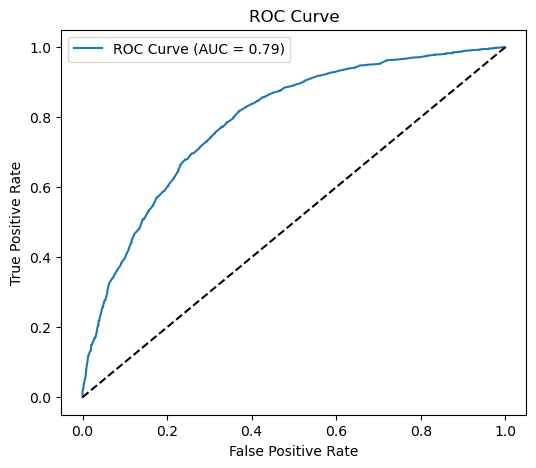

In [159]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [161]:
#Average importance
fi_df['Average'] = fi_df[['XGBoost','RandomForest']].mean(axis=1)
fi_df = fi_df.sort_values(by='Average', ascending=False)

print("\nTop 10 Important Features:\n", fi_df.head(10))


Top 10 Important Features:
               Feature   XGBoost  RandomForest   Average
4              coupon  0.036063      0.143133  0.089598
1           passanger  0.019730      0.052283  0.036007
5          expiration  0.021474      0.047283  0.034378
0         destination  0.019836      0.047846  0.033841
3         temperature  0.017237      0.048101  0.032669
11         occupation  0.021746      0.039441  0.030594
23      direction_opp  0.040169      0.018572  0.029371
2             weather  0.027120      0.027982  0.027551
20  toCoupon_GEQ15min  0.015343      0.039548  0.027445
26         Income_Age  0.021156      0.033181  0.027169


## visualizing the important features

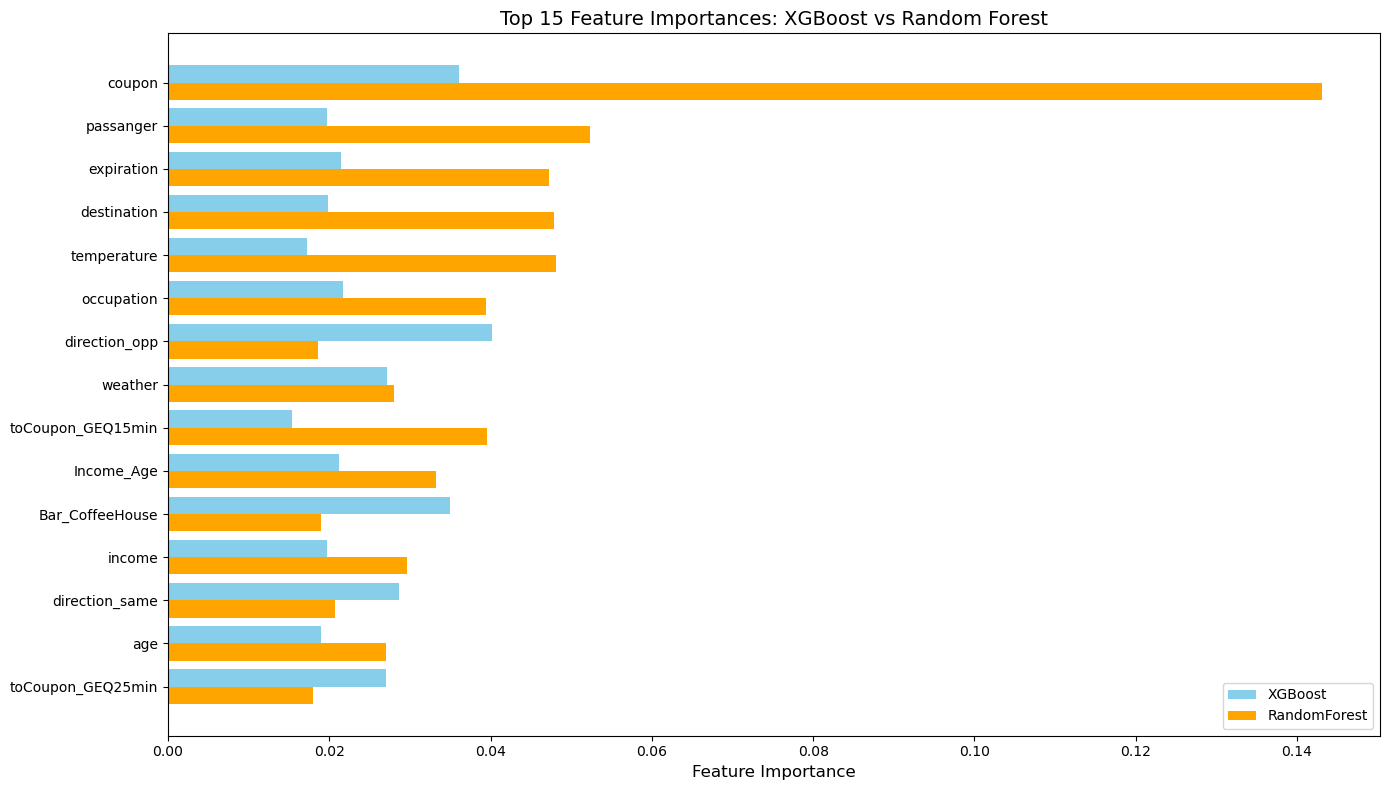

In [157]:
# make sure models are fitted
rf.fit(X_train_full, y_train)
best_xgb.fit(X_train_full, y_train)

# get importances
xgb_importances = best_xgb.feature_importances_
rf_importances  = rf.feature_importances_

# generate correct feature names
# original + polynomial names
poly_feature_names = poly.get_feature_names_out(numeric_cols)
feature_names_full = list(X_train.columns) + list(poly_feature_names)

# truncate to match importance lengths
feature_names_full = feature_names_full[:len(xgb_importances)]

# create dataframe
fi_df = pd.DataFrame({
    "Feature": feature_names_full,
    "XGBoost": xgb_importances[:len(feature_names_full)],
    "RandomForest": rf_importances[:len(feature_names_full)]
})

# average importance
fi_df["Average"] = fi_df[["XGBoost", "RandomForest"]].mean(axis=1)
fi_df = fi_df.sort_values(by="Average", ascending=False)

# plot top 15
top = fi_df.head(15)
indices = np.arange(len(top))
bar_width = 0.4

plt.figure(figsize=(14, 8))
plt.barh(indices, top["XGBoost"], bar_width, label="XGBoost", color="skyblue")
plt.barh(indices + bar_width, top["RandomForest"], bar_width, label="RandomForest", color="orange")
plt.yticks(indices + bar_width / 2, top["Feature"])
plt.xlabel("Feature Importance", fontsize=12)
plt.title("Top 15 Feature Importances: XGBoost vs Random Forest", fontsize=14)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
